In [40]:
# ======================================
# 1) IMPORTS Y CARGA DEL DATASET
# ======================================


import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

df = pd.read_csv("AI_Impact_on_Jobs_2030.csv")
df.head()


,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


In [39]:
# ======================================
# 2) EDA BÁSICO
# ======================================

# Dimensiones
df.shape

# Info de columnas (tipos, nulos)
df.info()

# Estadísticas básicas de columnas numéricas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


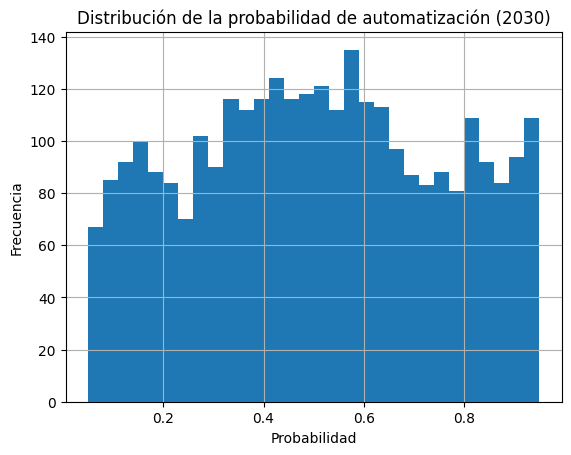

In [41]:
# ======================================
# 3) DISTRIBUCIÓN DE LA PROBABILIDAD DE AUTOMATIZACIÓN
# ======================================

plt.figure()
df["Automation_Probability_2030"].hist(bins=30)
plt.title("Distribución de la probabilidad de automatización (2030)")
plt.xlabel("Probabilidad")
plt.ylabel("Frecuencia")
plt.show()


In [42]:
# ======================================
# 4) CATEGORÍAS SIMPLES DE RIESGO (BAJO / MEDIO / ALTO)
# ======================================

df["Risk_Simple"] = pd.cut(
    df["Automation_Probability_2030"],
    bins=[0, 0.33, 0.66, 1],
    labels=["Bajo", "Medio", "Alto"],
    include_lowest=True
)

# Conteo por categoría
df["Risk_Simple"].value_counts()


Risk_Simple
Medio    1285
Alto      862
Bajo      853
Name: count, dtype: int64

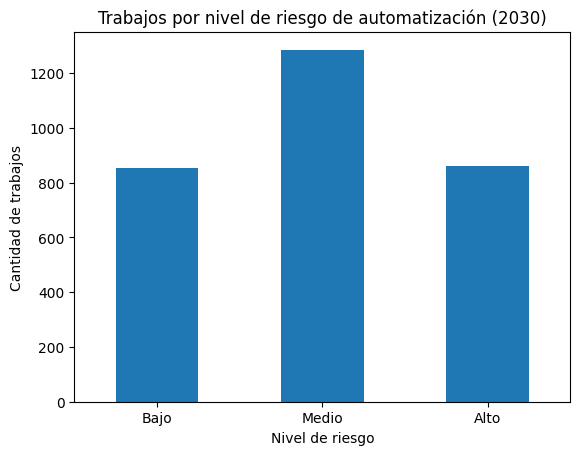

In [43]:
# Gráfico de barras de nivel de riesgo
risk_counts = df["Risk_Simple"].value_counts().sort_index()

plt.figure()
risk_counts.plot(kind="bar")
plt.title("Trabajos por nivel de riesgo de automatización (2030)")
plt.xlabel("Nivel de riesgo")
plt.ylabel("Cantidad de trabajos")
plt.xticks(rotation=0)
plt.show()


<Figure size 1000x300 with 0 Axes>

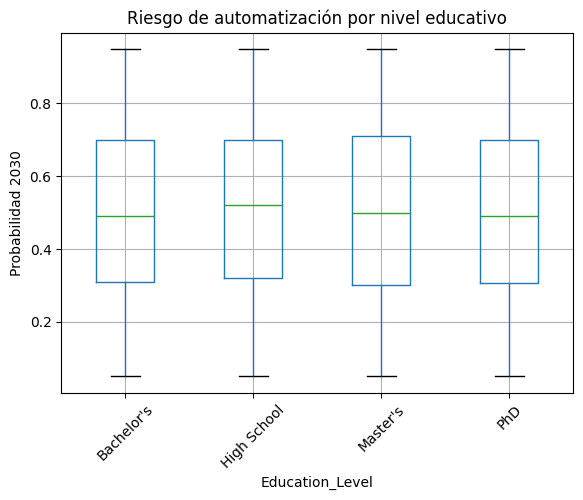

In [57]:
# ======================================
# 5) RIESGO POR NIVEL EDUCATIVO (BOXPLOT)
# ======================================

plt.figure(figsize=(10, 3))
df.boxplot(column="Automation_Probability_2030", by="Education_Level")
plt.title("Riesgo de automatización por nivel educativo")
plt.suptitle("")  # saca el título extra
plt.ylabel("Probabilidad 2030")
plt.xticks(rotation=45)
plt.show()


In [45]:
# ======================================
# 6) TOP 10 PROFESIONES CON MÁS RIESGO (PROMEDIO)
# ======================================

job_risk = (
    df.groupby("Job_Title")["Automation_Probability_2030"]
      .mean()
      .sort_values(ascending=False)
)

top10 = job_risk.head(10)
top10


Job_Title
Retail Worker          0.834710
Security Guard         0.833052
Construction Worker    0.825962
Customer Support       0.825263
Truck Driver           0.818627
Graphic Designer       0.529000
Software Engineer      0.508686
Data Scientist         0.496287
Chef                   0.495674
Marketing Manager      0.494776
Name: Automation_Probability_2030, dtype: float64

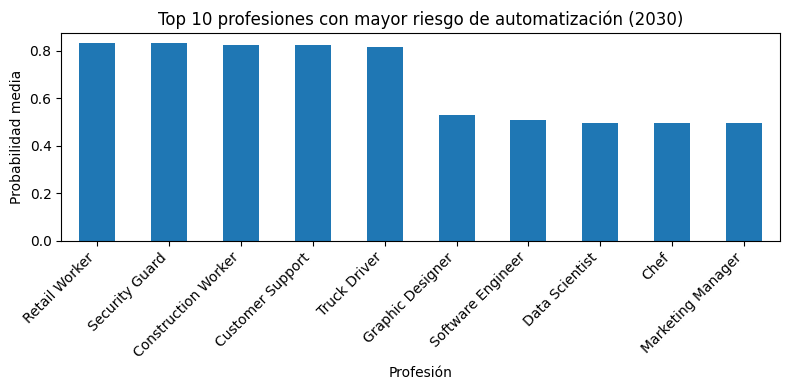

In [46]:
plt.figure(figsize=(8, 4))
top10.plot(kind="bar")
plt.title("Top 10 profesiones con mayor riesgo de automatización (2030)")
plt.ylabel("Probabilidad media")
plt.xlabel("Profesión")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [47]:
# ======================================
# 7) % DE RIESGO ALTO POR PROFESIÓN
# ======================================

risk_by_job = (
    pd.crosstab(df["Job_Title"], df["Risk_Category"], normalize="index")
      ["High"]                      # proporción de "High"
      .sort_values(ascending=False)
)

risk_by_job.head(10)


Job_Title
Customer Support       1.000000
Security Guard         0.987013
Construction Worker    0.980769
Retail Worker          0.980645
Truck Driver           0.980392
Chef                   0.000000
AI Engineer            0.000000
Data Scientist         0.000000
HR Specialist          0.000000
Doctor                 0.000000
Name: High, dtype: float64

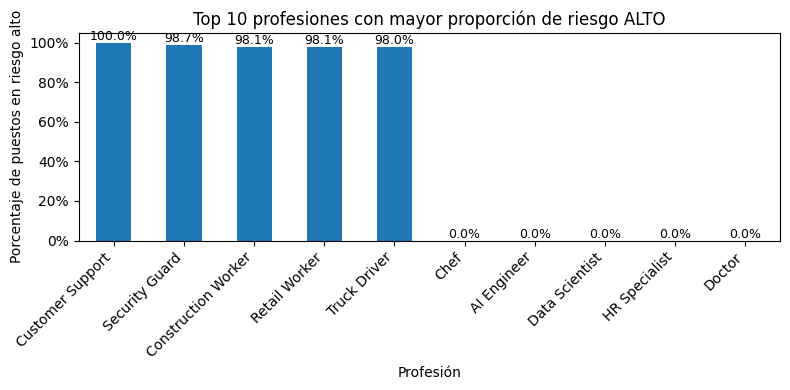

In [58]:
import matplotlib.ticker as mticker  # al principio del notebook, una sola vez

plt.figure(figsize=(8, 4))

# Paso 1: pasar a porcentaje (0–100)
risk_top10_pct = (risk_by_job.head(10) * 100)

ax = risk_top10_pct.plot(kind="bar")

plt.title("Top 10 profesiones con mayor proporción de riesgo ALTO")
plt.ylabel("Porcentaje de puestos en riesgo alto")
plt.xlabel("Profesión")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Paso 2: formato del eje Y como %
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100))

# Paso 3: mostrar el valor arriba de cada barra
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f"{value:.1f}%",                                # texto a mostrar
        (p.get_x() + p.get_width() / 2, value),         # posición (centro de la barra, altura)
        ha="center", va="bottom", fontsize=9
    )

plt.show()



In [49]:
# ======================================
# 8) % DE RIESGO ALTO POR NIVEL EDUCATIVO
# ======================================

risk_by_edu = (
    pd.crosstab(df["Education_Level"], df["Risk_Category"], normalize="index")
      ["High"]
      .sort_values(ascending=False)
)

risk_by_edu


Education_Level
Master's       0.255782
PhD            0.247207
Bachelor's     0.245752
High School    0.238520
Name: High, dtype: float64

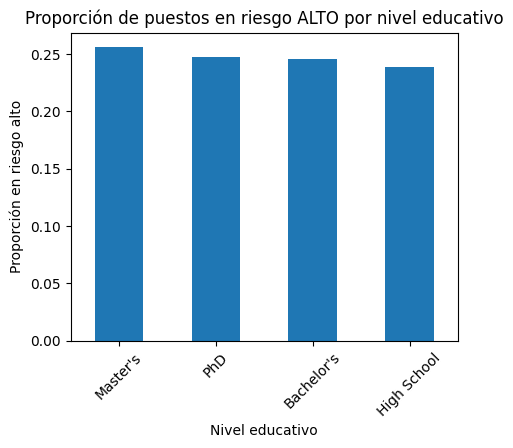

In [50]:
plt.figure(figsize=(5, 4))
risk_by_edu.plot(kind="bar")
plt.title("Proporción de puestos en riesgo ALTO por nivel educativo")
plt.ylabel("Proporción en riesgo alto")
plt.xlabel("Nivel educativo")
plt.xticks(rotation=45)
plt.show()


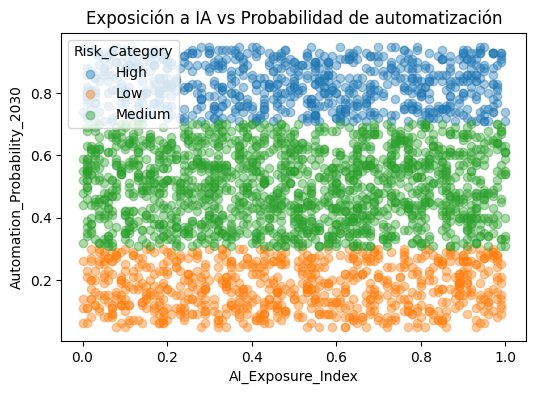

In [52]:
# Scatter coloreado por categoría de riesgo
plt.figure(figsize=(6, 4))

for cat, sub in df.groupby("Risk_Category"):
    plt.scatter(
        sub["AI_Exposure_Index"],
        sub["Automation_Probability_2030"],
        alpha=0.4,
        label=cat
    )

plt.title("Exposición a IA vs Probabilidad de automatización")
plt.xlabel("AI_Exposure_Index")
plt.ylabel("Automation_Probability_2030")
plt.legend(title="Risk_Category")
plt.show()


In [53]:
# ======================================
# 10) FEATURE ENGINEERING: NUEVAS COLUMNAS
# ======================================

# Riesgo 0–100
df["Risk_Score_100"] = (df["Automation_Probability_2030"] * 100).round(1)

# Flag de riesgo alto
df["High_Risk_Flag"] = (df["Risk_Category"] == "High").astype(int)

# Intensidad de skills (promedio de Skill_1 a Skill_10)
skill_cols = [c for c in df.columns if c.startswith("Skill_")]
df["Skill_Intensity"] = df[skill_cols].mean(axis=1).round(3)

df[[
    "Job_Title",
    "Automation_Probability_2030",
    "Risk_Score_100",
    "Risk_Category",
    "High_Risk_Flag",
    "Skill_Intensity"
]].head()


,Job_Title,Automation_Probability_2030,Risk_Score_100,Risk_Category,High_Risk_Flag,Skill_Intensity
0,Security Guard,0.85,85.0,High,1,0.385
1,Research Scientist,0.05,5.0,Low,0,0.426
2,Construction Worker,0.81,81.0,High,1,0.451
3,Software Engineer,0.60,60.0,Medium,0,0.492
4,Financial Analyst,0.64,64.0,Medium,0,0.465


In [54]:
# ======================================
# 11) RESUMEN POR PROFESIÓN
# ======================================

job_summary = (
    df.groupby("Job_Title")
      .agg(
          Jobs=("Job_Title", "size"),
          High_Risk_Share=("High_Risk_Flag", "mean"),
          Avg_Risk_Score=("Risk_Score_100", "mean"),
          Avg_Salary=("Average_Salary", "mean"),
          Avg_Experience=("Years_Experience", "mean"),
          Avg_AI_Exposure=("AI_Exposure_Index", "mean"),
          Avg_Skill_Intensity=("Skill_Intensity", "mean")
      )
      .reset_index()
)

# Ajustar formatos
job_summary["High_Risk_Share"] = (job_summary["High_Risk_Share"] * 100).round(1)
job_summary["Avg_Risk_Score"] = job_summary["Avg_Risk_Score"].round(1)
job_summary["Avg_Salary"] = job_summary["Avg_Salary"].round(0)

job_summary.head()


,Job_Title,Jobs,High_Risk_Share,Avg_Risk_Score,Avg_Salary,Avg_Experience,Avg_AI_Exposure,Avg_Skill_Intensity
0,AI Engineer,140,0.0,17.2,90760.0,14.442857,0.474286,0.501893
1,Chef,141,0.0,49.6,91408.0,14.929078,0.528794,0.494149
2,Construction Worker,156,98.1,82.6,90800.0,14.557692,0.504808,0.498096
3,Customer Support,133,100.0,82.5,87487.0,14.000000,0.501504,0.510398
4,Data Scientist,167,0.0,49.6,90630.0,13.898204,0.512874,0.503952


In [55]:
# Top profesiones por % de riesgo ALTO
job_summary.sort_values("High_Risk_Share", ascending=False).head(10)


,Job_Title,Jobs,High_Risk_Share,Avg_Risk_Score,Avg_Salary,Avg_Experience,Avg_AI_Exposure,Avg_Skill_Intensity
3,Customer Support,133,100.0,82.5,87487.0,14.000000,0.501504,0.510398
15,Security Guard,154,98.7,83.3,87290.0,14.201299,0.515000,0.495890
14,Retail Worker,155,98.1,83.5,87208.0,14.838710,0.505548,0.493716
2,Construction Worker,156,98.1,82.6,90800.0,14.557692,0.504808,0.498096
18,Truck Driver,153,98.0,81.9,84520.0,14.875817,0.520131,0.505673
1,Chef,141,0.0,49.6,91408.0,14.929078,0.528794,0.494149
0,AI Engineer,140,0.0,17.2,90760.0,14.442857,0.474286,0.501893
4,Data Scientist,167,0.0,49.6,90630.0,13.898204,0.512874,0.503952
8,HR Specialist,157,0.0,49.1,89242.0,15.439490,0.489236,0.504408
5,Doctor,132,0.0,17.7,89092.0,14.674242,0.505152,0.491894


In [59]:
# ======================================
# 12) GUARDAR DATASETS PARA POWER BI
# ======================================

# Dataset enriquecido fila a fila
df.to_csv("AI_Impact_on_Jobs_2030_enriched.csv", index=False)

# Resumen por profesión
job_summary.to_csv("AI_Impact_on_Jobs_2030_jobs_summary.csv", index=False)
